# DATA AGGREGATION WITH SIMPLE TIME SERIES DATASET

In [9]:
!pip install display

  Preparing metadata (setup.py) ... done
  Created wheel for display: filename=display-1.0.0-py3-none-any.whl size=1380 sha256=df33b0da0ab3fb60f0f08afa342f4d0d5c9d28c3153e31c9f3b887470cdeabb7
  Stored in directory: /Users/sharanyasenthil/Library/Caches/pip/wheels/b3/45/b2/c40be70bc2856c345453aafc8ad480489e0b05222447531987
Successfully built display


In [12]:
import numpy as np
import pandas as pd
import IPython.display

In [2]:
df = pd.read_csv("/Users/sharanyasenthil/Downloads/DataScience-main/store.csv")

In [14]:
df.head()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS


In [4]:
print(df.shape)

(14260, 10)


## I GROUP-BY

df = df.loc[:6000, ['MONTH','STORECODE','QTY','VALUE','MBRD']]

In [17]:
df.head()

,MONTH,STORECODE,QTY,VALUE,MBRD
0,M1,P1,25,83,DOVE
1,M1,P1,6,22,DOVE
2,M1,P1,4,15,DOVE
3,M1,P1,15,60,GARNIER
4,M1,P2,0,0,CLINIC PLUS


In [19]:
display(df.head)

<bound method NDFrame.head of      MONTH STORECODE  QTY  VALUE         MBRD
0       M1        P1   25     83         DOVE
1       M1        P1    6     22         DOVE
2       M1        P1    4     15         DOVE
3       M1        P1   15     60      GARNIER
4       M1        P2    0      0  CLINIC PLUS
...    ...       ...  ...    ...          ...
5996    M2        P5    1     39     LIFEBUOY
5997    M2        P5    4     39     LIFEBUOY
5998    M2        P5    5    145        LIRIL
5999    M2        P5   27    271       DETTOL
6000    M2        P5   19    194      CINTHOL

[6001 rows x 5 columns]>

## Grouping
### Which feaure to group ?
### Split, Apply, Combine
### 1. We need the total quantity sold

In [23]:
df1 = df.loc[:6000, ['MONTH','QTY']]

In [24]:
df1 = df1.groupby(['MONTH']).sum()

In [25]:
df1.head()

,QTY
MONTH,
M1,27571
M2,29419
M3,28031


#### So many quantities were sold in it's respective sum

### 2. We need the total quantity that is sold by one quantity

In [27]:
df2 = df.loc[:6000,['MBRD','QTY']]
df2 = df2.groupby(['MBRD']).sum()
df2.head()

,QTY
MBRD,
7 O'CLOCK,2
A ANANDI,1
AACHI,66
AAREY,10
ACTIVE POWER,658


 ### 3.We need the quantity sold in each month

In [29]:
df2 = df.loc[:6000,['MONTH','VALUE','MBRD','QTY']]
df2 = df2.groupby(['MBRD', 'MONTH']).sum()
df2.head()

VALUE  QTY
MBRD      MONTH            
7 O'CLOCK M1       175    1
          M2       175    1
          M3         0    0
A ANANDI  M2        36    1
AACHI     M1       643   28

### AGGREGATION

In [30]:
df2 = df.loc[:6000,['MONTH','VALUE','MBRD','QTY']]
df2 = df2.groupby(['MBRD', 'MONTH']).agg([np.mean, np.sum, np.std])
df2.head()

VALUE                        QTY              
                       mean  sum         std      mean sum       std
MBRD      MONTH                                                     
7 O'CLOCK M1     175.000000  175         NaN  1.000000   1       NaN
          M2     175.000000  175         NaN  1.000000   1       NaN
          M3       0.000000    0         NaN  0.000000   0       NaN
A ANANDI  M2      36.000000   36         NaN  1.000000   1       NaN
AACHI     M1     214.333333  643  184.500226  9.333333  28  10.40833

## II. ROLLING WINDOW METHOD

In [31]:
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("/Users/sharanyasenthil/Downloads/stock prices.csv")

In [33]:
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


### Picking only Apple Stocks

In [37]:
df = df.loc[df['symbol'] == 'AAPL']

In [38]:
df.shape

(1007, 7)

In [39]:
df.head()

,symbol,date,open,high,low,close,volume
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
484,AAPL,2014-01-03,78.9799,79.0999,77.2042,77.2828,98303870
967,AAPL,2014-01-06,76.7785,78.1142,76.2285,77.7042,103359151
1450,AAPL,2014-01-07,77.7599,77.9942,76.8464,77.1481,79432766
1933,AAPL,2014-01-08,76.9728,77.9371,76.9556,77.6371,64686685


### Picking only 2014 stocks

In [41]:
df = df.loc[df['date'] <= '2015-01-01']

In [42]:
df

,symbol,date,open,high,low,close,volume
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
484,AAPL,2014-01-03,78.9799,79.0999,77.2042,77.2828,98303870
967,AAPL,2014-01-06,76.7785,78.1142,76.2285,77.7042,103359151
1450,AAPL,2014-01-07,77.7599,77.9942,76.8464,77.1481,79432766
1933,AAPL,2014-01-08,76.9728,77.9371,76.9556,77.6371,64686685
...,...,...,...,...,...,...,...
119958,AAPL,2014-12-24,112.5800,112.7100,112.0100,112.0100,14479611
120446,AAPL,2014-12-26,112.1000,114.5200,112.0100,113.9900,33720951
120934,AAPL,2014-12-29,113.7900,114.7700,113.7000,113.9100,27598920
121422,AAPL,2014-12-30,113.6400,113.9200,112.1100,112.5200,29881477


In [43]:
df2 = pd.DataFrame(df.close)

In [44]:
df2

,close
1,79.0185
484,77.2828
967,77.7042
1450,77.1481
1933,77.6371
...,...
119958,112.0100
120446,113.9900
120934,113.9100
121422,112.5200


### Applying data aggregation to the close column

In [48]:
df2['AVG_7'] = df2.close.rolling(window=7).mean()

In [49]:
df2

,close,AVG_7
1,79.0185,NaN
484,77.2828,NaN
967,77.7042,NaN
1450,77.1481,NaN
1933,77.6371,NaN
...,...,...
119958,112.0100,111.153571
120446,113.9900,112.188571
120934,113.9100,112.831429
121422,112.5200,112.812857


In [50]:
df2['AVG_7'] = df2.close.rolling(window=7, min_periods=1).mean()
#### if the min_period = 1, then only rolling will take place

In [52]:
df2.head()

,close,AVG_7
1,79.0185,79.018500
484,77.2828,78.150650
967,77.7042,78.001833
1450,77.1481,77.788400
1933,77.6371,77.758140


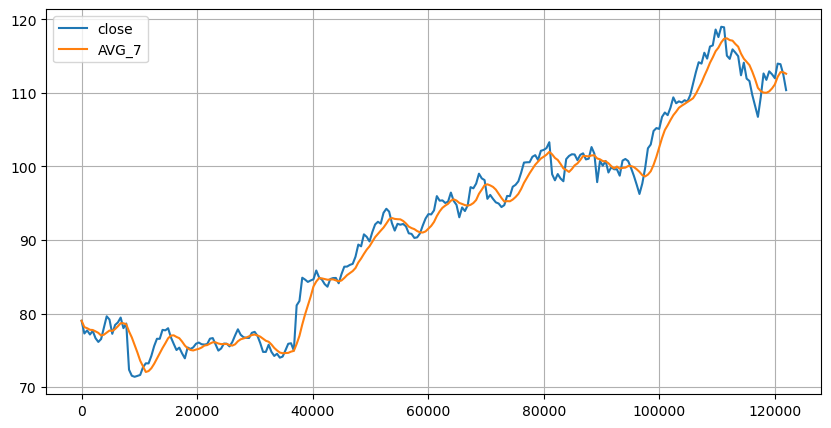

In [57]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(df2['close'], label = 'close')
plt.plot(df2['AVG_7'], label = 'AVG_7')
plt.legend(loc = 2)

### Yellow line has less spikes, hence avg_7 is much better.